In [ ]:
# pip install mpld3

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()

%matplotlib inline

In [155]:
# Calibration for x axis

m = 0.06275314836002217
b = -0.19536577738644514

In [154]:
from scipy.optimize import curve_fit

def gaussian(x,A,wc,g): #(input, area under peak, center energy, HWHM )
    return (A/(np.sqrt(2*np.pi)*g)) * np.exp(-(x-wc)**2 / (2*g**2))

def lorentzian(x,A,wc,g):
    return (A/(1 + ((x-wc)/g)**2)) / (np.pi*g)

def pseudoVoigt(x,A,wc,g,f): #(1, peak_value, std_dev, 1)
    return f*lorentzian(x,A,wc,g)+(1-f)*gaussian(x,A,wc,g/np.sqrt(2*np.log(2)))

def comptonProfile(x,A,wc,g,f,y0):
    return y0+pseudoVoigt(x,A,wc,g,f)

def comptonFit(x, y):
    peak_index = np.argmax(y)
    peak_value = x[peak_index]
    poissonError = np.sqrt(y)
    std_dev = np.sqrt(sum((x - peak_value) ** 2) / (sum(y)-1)) #sample standard deviation
    peak_Area = sum(input_y)
    print(peak_Area, peak_value, peak_index, std_dev)
    popt, pcov = curve_fit(comptonProfile, x, y, p0=[peak_Area, peak_value, std_dev, 1, 10], sigma = poissonError, maxfev=5000)
    return popt, pcov


# Background

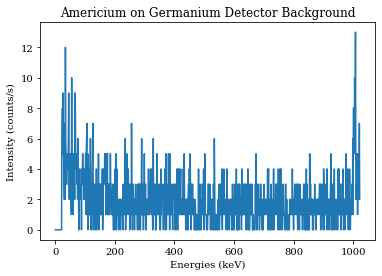

In [8]:
#%matplotlib qt
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"
plt.title('Americium on Germanium Detector Background')
plt.xlabel('Energies (keV)')
plt.ylabel('Intensity (counts/s)')
background =np.loadtxt('Calibrations/BackgroundRadiationGe85gain1500volts840sec.Spe',skiprows=12, max_rows=1023)
plt.plot(background)

In [ ]:
background

# Aluminum

In [10]:
# Read files

files = glob.glob('Americium_Aluminum/*.Spe')
am_al_dict = {}

for f in files:
    angle = f.split('AmericiumAl')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    am_al_dict[angle] = entry

## Plot Raw Data

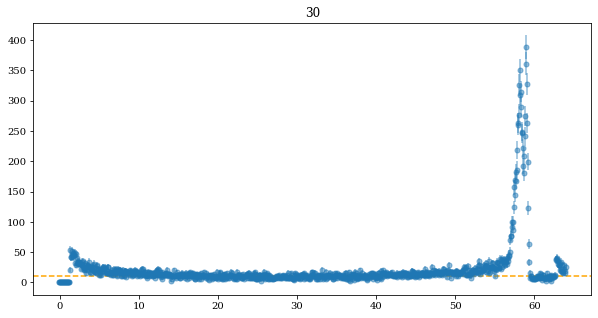

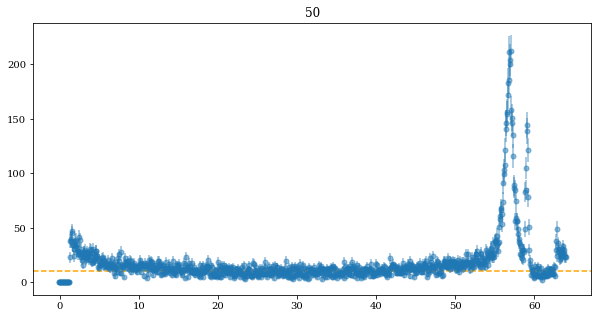

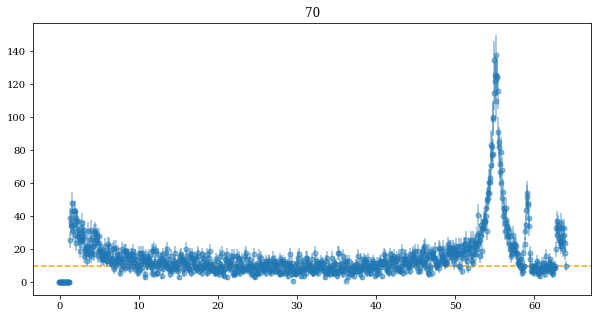

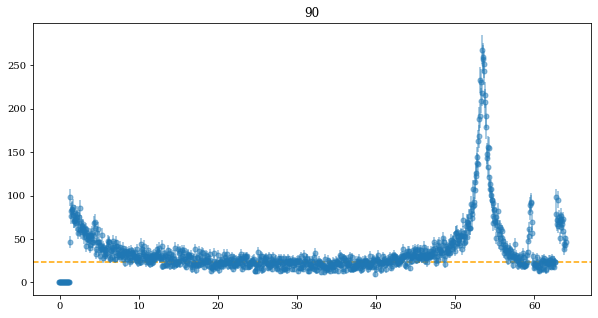

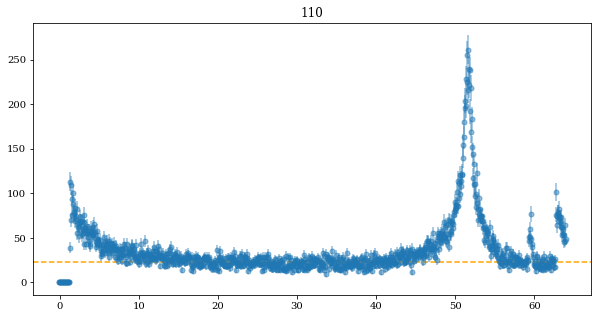

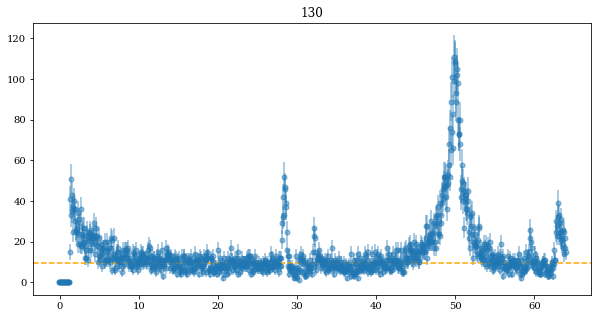

In [104]:
bins = np.linspace(1,1023,1023)

%matplotlib inline
for angle in ['30','50','70','90','110','130']:
    entry = am_al_dict[angle]
    plt.figure(figsize=(10,5))

    x1 = entry['x1']
    x2 = entry['x2']
    
    # Use average background
    bg_level = np.mean(entry['data'][200:600])
    #bg_level_poisson_error = np.sqrt(entry['data'][200:600])/int(entry['time'])

    plt.errorbar(bins*m+b, entry['data'], yerr=np.sqrt(entry['data']),fmt='o',markersize=5, alpha = 0.5, label='data') 
    plt.axhline(bg_level,linestyle='dashed',c='orange')
    plt.title(angle)
    

In [119]:
# Select compton energy peaks

am_al_dict['30']['x1'] = 650
am_al_dict['30']['x2'] = 937

am_al_dict['50']['x1'] = 650
am_al_dict['50']['x2'] = 935

am_al_dict['70']['x1'] = 650
am_al_dict['70']['x2'] = 935

am_al_dict['90']['x1'] = 600
am_al_dict['90']['x2'] = 900

am_al_dict['110']['x1'] = 620
am_al_dict['110']['x2'] = 870

am_al_dict['130']['x1'] = 650
am_al_dict['130']['x2'] = 850

# am_al_dict['150']['x1'] = 650
# am_al_dict['150']['x2'] = 800

22160.0 930.0 279 26.944701846670803
8090.334842132974 930.3153797074068 8.924038685369245 0.9497062258028032 13.72502177664155
184.41047392269093 0.23247557720143514 0.4384742043937469 0.05977630860713632 0.2947008508823325


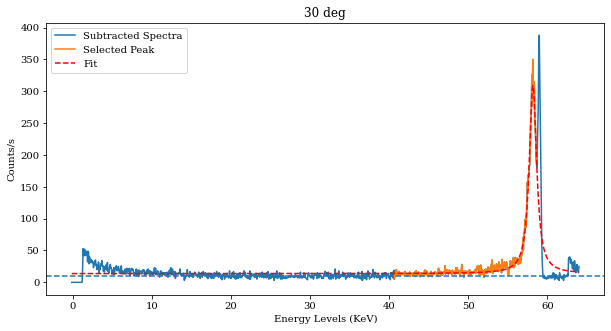

18688.0 912.0 261 26.525090829266272
5252.229647636161 908.4322421003244 8.97961792407093 1.0001016895696824 12.163841570659056
116.68900987943513 0.21600529718818431 0.4708451856844649 0.06760025304312645 0.29702676520503013


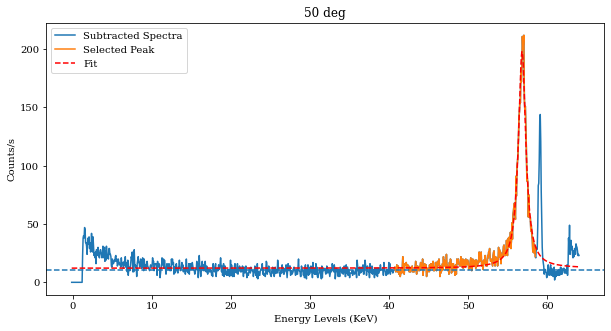

16395.0 883.0 232 24.373748786127404
3911.7101278161413 881.0418085712931 10.06198266597522 1.136625198795741 11.05473192866133
114.46471330954414 0.3246939277483465 0.7944241060733157 0.08928171679351735 0.3326826444923447


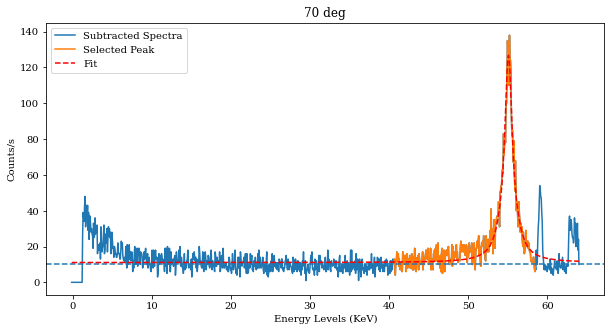

36988.0 854.0 253 18.622844409043914
9309.002375942307 854.682731915739 11.881770343877122 1.2638042086517682 23.85444168553436
187.77886565775967 0.26909976414387604 0.6957867589700506 0.059410372655058705 0.4773285526394102


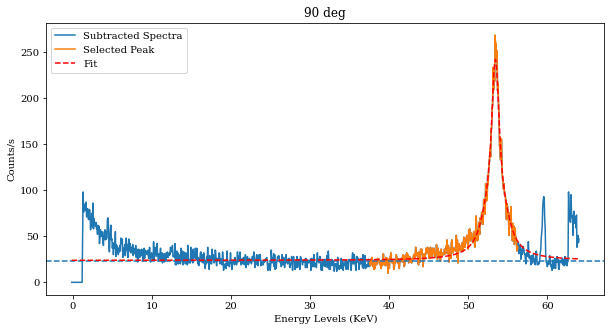

36661.0 826.0 205 14.238267110579029
9715.311606651334 824.7104901601178 12.376257314139746 1.355455089163877 22.75099669033647
220.58610077371586 0.30098062600835124 0.7591039244623398 0.058059813292998454 0.6070738954089567


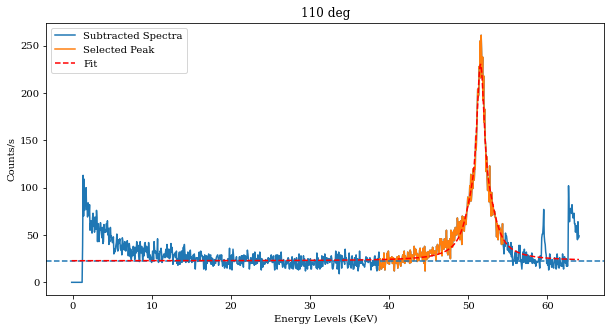

14912.0 797.0 146 13.837660070869417
4539.258003958986 798.7381145140939 13.261654226991444 1.3385769091422715 7.992212928260514
156.66550719996692 0.43183620569260217 1.1145978703764086 0.07971873620115118 0.5023748337993812


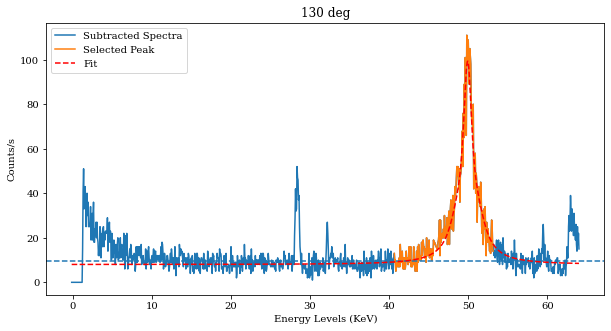

In [136]:
%matplotlib inline
bins = np.linspace(1,1023,1023)
al_data = []

for angle in ['30','50','70','90','110','130']:
    entry = am_al_dict[angle]

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    input_y = entry['data']

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Estimate background
    bg = np.mean(input_y[200:600])

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,input_y, label='Subtracted Spectra')
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')
    plt.axhline(bg, linestyle='dashed')

    [A,wc,g,f,y0],pcov = comptonFit(xdata, ydata)
    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,f_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,f,y0)
    print(A_err,wc_err,g_err,f_err,y0_err)


    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b,comptonProfile(input_x,A,wc,g,f,y0), '--r', label='Fit')
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()

    al_data.append(np.array([int(angle),int(am_al_dict[angle]['time']),A,wc*m+b,g,f,y0,A_err,wc_err,g_err,f_err,y0_err]))



In [ ]:
#%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [137]:
# Get fit parameters
angles_am_al, times_am_al, As_am_al, shifts_am_al, sigmas_am_al, fs_am_al, bgs_am_al, As_err_am_al,shifts_err_am_al, sigmas_err_am_al, fs_err_am_al, bgs_err_am_al = np.transpose(np.array(al_data))

In [141]:
shifts_err_am_al

array([0.23247558, 0.2160053 , 0.32469393, 0.26909976, 0.30098063,
       0.43183621])

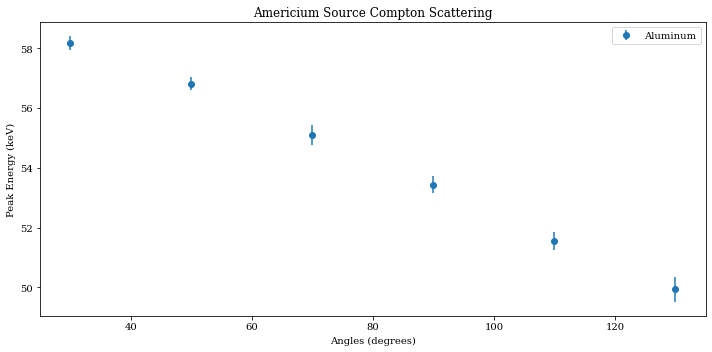

In [140]:

plt.figure(figsize=(10,5))
plt.errorbar(angles_am_al,shifts_am_al,yerr=shifts_err_am_al,fmt='o',label='Aluminum')
# plt.plot(angles_am_pb,shifts_am_pb,'o',label='Lead')
plt.xlabel('Angles (degrees)')
plt.ylabel('Peak Energy (keV)')
plt.title('Americium Source Compton Scattering')
plt.legend()
plt.tight_layout()


#### Compare compton shifts to theoretical values

In [143]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [144]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 59.5 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

In [145]:
# Fit compton shifts, slope should correspond to 1 / mc^2, where m is electron mass
m_am_al,b_am_al = np.polyfit(1-np.cos(np.radians(angles_am_al)), 1/(shifts_am_al), 1)
thetas = np.linspace(0,180,180)

In [146]:
shifts_err_am_al/shifts_am_al

array([0.00399547, 0.00380213, 0.00589358, 0.00503568, 0.00583773,
       0.00864918])

In [151]:
# Plot compton shifts
plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_am_al)), 1/(shifts_am_al),yerr=(shifts_err_am_al/shifts_am_al**2),fmt='o',markersize = 10, label = 'Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV, label = 'Theoretical Values')
# plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts_adjusted * keV, label = 'Theoretical Values Adjusted')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_am_al+b_am_al, '--', label = 'Data Fit')
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_am_al),(0.75,0.017))
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()


In [152]:
m_am_al

0.0018597128558009185

# Lead

In [156]:
files = glob.glob('Americium_Lead/*.Spe')
am_pb_dict = {}

%matplotlib inline
for f in files:
    angle = f.split('AmericiumPb')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    am_pb_dict[angle] = entry

In [161]:
am_pb_dict['50']['x1'] = 850
am_pb_dict['50']['x2'] = 935

am_pb_dict['70']['x1'] = 850
am_pb_dict['70']['x2'] = 935

am_pb_dict['90']['x1'] = 800
am_pb_dict['90']['x2'] = 920

am_pb_dict['110']['x1'] = 750
am_pb_dict['110']['x2'] = 900

am_pb_dict['130']['x1'] = 700
am_pb_dict['130']['x2'] = 850

am_pb_dict['150']['x1'] = 700
am_pb_dict['150']['x2'] = 850

# am_al_dict['150']['x1'] = 650
# am_al_dict['150']['x2'] = 800

224112.0 917.0 66 2.2664905191833746
4076.723041751089 919.0809524182254 3.8030103473684695 2.124762961256576 189.41216808584855
234.52642566364545 0.2240456608083383 0.1975305275846368 0.0527796213684717 2.4802427545927865


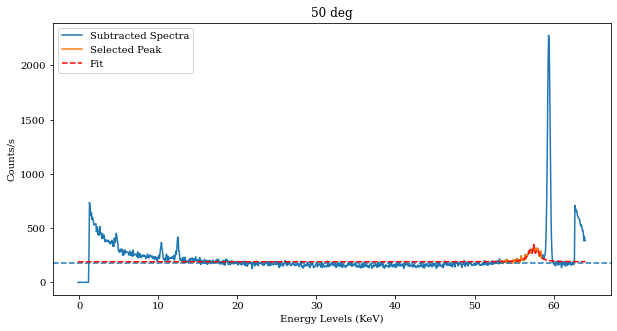

213672.0 888.0 37 1.702826811878225
2735.0487450321393 891.0737921345925 5.667769829157782 1.9548401735418053 188.11069842906346
431.6177981129804 0.578228114899773 0.6896445498448136 0.10516983965114624 4.1099025060274395


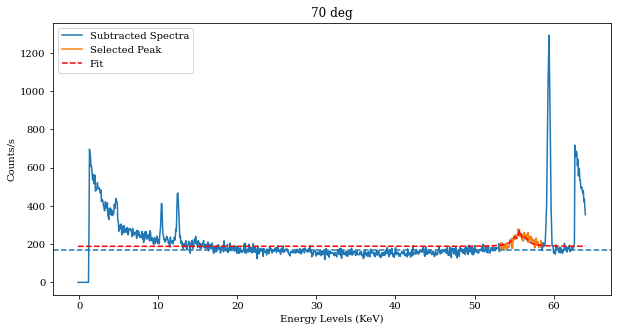

209805.0 857.0 56 2.4921739161526903
3688.5678953461315 870.9093608486925 7.816999402305214 2.2664109992918053 169.44117131841176
369.2425002992366 0.5278304799869161 0.4436012440607615 0.05841430773808343 2.538757068506568


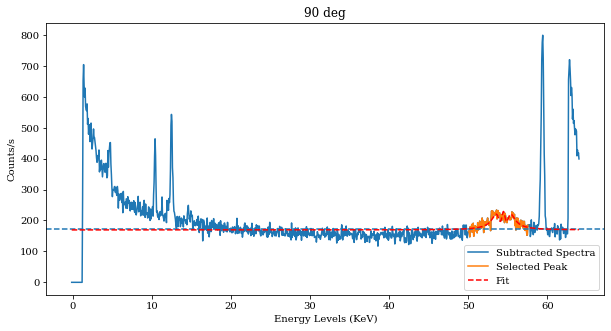

198655.0 832.0 81 3.3552324292858193
2779.2645711517084 833.3368071600264 12.575096581590588 1.8503622741956616 154.37196514770332
659.0493665723013 1.4186465616822599 2.161370618604661 0.13567512935082468 3.189840869527608


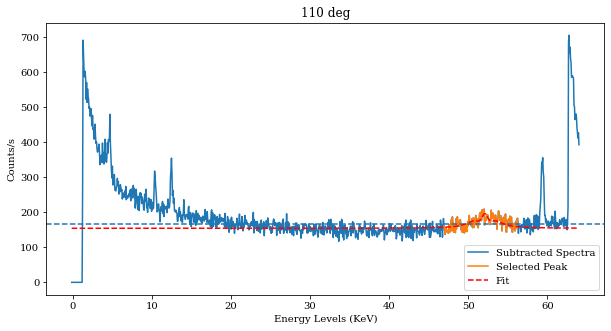

199484.0 811.0 110 4.228453502779614
8503.555286062881 808.7305344488985 34.10680822483038 1.1650318518145895 137.92782979454583
3783.8808069233146 1.2885732332158633 5.794857757097379 0.32842400159319446 9.910354577616177


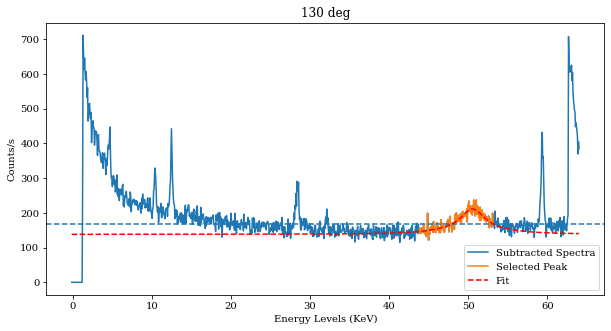

184909.0 783.0 82 3.4136082593650086
3980.823759320333 780.8492755075421 8.549008234964903 1.6836199361125483 141.4038723852982
371.5354419822238 0.5326144375593084 0.9780707736514977 0.09179302697291043 2.133582739994176


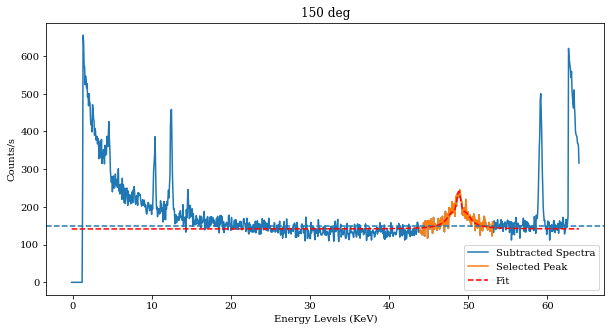

In [163]:
%matplotlib inline
bins = np.linspace(1,1023,1023)
pb_data = []

for angle in ['50','70','90','110','130','150']:
    entry = am_pb_dict[angle]

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    input_y = entry['data']

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Estimate background
    bg = np.mean(input_y[200:600])

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,input_y, label='Subtracted Spectra')
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')
    plt.axhline(bg, linestyle='dashed')

    [A,wc,g,f,y0],pcov = comptonFit(xdata, ydata)
    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,f_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,f,y0)
    print(A_err,wc_err,g_err,f_err,y0_err)


    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b,comptonProfile(input_x,A,wc,g,f,y0), '--r', label='Fit')
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()

    pb_data.append(np.array([int(angle),int(am_pb_dict[angle]['time']),A,wc*m+b,g,f,y0,A_err,wc_err,g_err,f_err,y0_err]))



In [166]:
# Get fit parameters
angles_am_pb, times_am_pb, As_am_pb, shifts_am_pb, sigmas_am_pb, fs_am_pb, bgs_am_pb, As_err_am_pb,shifts_err_am_pb, sigmas_err_am_pb, fs_err_am_pb, bgs_err_am_pb = np.transpose(np.array(pb_data))

In [181]:
plt.figure()
plt.errorbar(angles_am_al,As_am_al,yerr=As_err_am_al,fmt='o')
plt.errorbar(angles_am_al,As_am_pb,yerr=As_err_am_pb,fmt='o')
plt.xlabel('Angles')
plt.ylabel('Cross Section')
plt.title('Cesium Source Lead Scattering Target')

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

#### Compare compton shifts to theoretical values

In [167]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [182]:
# Constants
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 59.5 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))
# Fit compton shifts, slope should correspond to 1 / mc^2, where m is electron mass
m_am_pb,b_am_pb = np.polyfit(1-np.cos(np.radians(angles_am_pb)), 1/(shifts_am_pb), 1)
thetas = np.linspace(0,180,180)

plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_am_pb)), 1/(shifts_am_pb),yerr=shifts_err_am_pb/shifts_am_pb**2,fmt='o',markersize = 10, label = 'Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV, label = 'Theoretical Values')
# plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts_adjusted * keV, label = 'Theoretical Values Adjusted')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_am_pb+b_am_pb, '--', label = 'Data Fit')
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_am_pb),(0.75,0.017))
plt.title('Americium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

In [169]:
%matplotlib qt
plt.figure(figsize=(10,5))
plt.errorbar(angles_am_al, shifts_am_al,yerr=shifts_err_am_al,fmt='o', markersize = 10, label='Aluminum',alpha = 0.7)
plt.errorbar(angles_am_pb, shifts_am_pb,yerr=shifts_err_am_pb,fmt='o', markersize = 10, label='Lead',alpha=0.7)
plt.xlabel('Angles (radians)')
plt.ylabel('Scattered Photon Energy (keV)')
plt.title('Americium Scattering')
plt.legend()
plt.tight_layout()

In [170]:
f, axes = plt.subplots(6, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Americium 241 Source Scattered on Aluminum Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.02, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles =['30','50','70','90','110','130']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,am_al_dict[angles[i]]['data']/int(am_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.3,0.5), xycoords='axes fraction')

In [ ]:
f, axes = plt.subplots(6, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Americium 241 Source Scattered on Lead Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.02, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b, am_pb_dict[angles[i]]['data']/int(am_pb_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.3,0.5), xycoords='axes fraction')

# Cross Section

In [171]:
re = 2.818e-13 #cm classical radiums of the electron
keV_g = 1.602176634e-9 #g cm^2/s^2 = erg
speed_of_light_cm = 29979245800 #cm/s
mass_of_electron = 9.10938356e-31 #kg
mass_of_electron_g = 9.10938356e-28 #kg
# plank = 6.62607004e-34
compton_wavelength = 2.42631023867e-12 #m
compton_wavelength_cm = 2.42631023867e-10 #cm


r = 25.5 #cm, distance from target to detector
h_target = 7.7 #cm
d_target = 1.9 #cm
crystal_area = 5.08 * 5.08 #cm**2

N0 = 6e23 #Avogadro's number
# What is the Cs's Currie?
I0 = 3.7e10 * 3.69e-3 / (4 * np.pi * r**2) # 1/(cm^2 s)

A_al = 26.9 #atomic weight of aluminum
A_pb = 207.2 #atomic weight of Lead
Z_al = 13 #atomic number of aluminum
Z_pb = 82 #atomic number of Lead

rho_al = 2.7 #g/cm^3
rho_pb = 11.35 #g/cm^3

N_al = np.pi * ( d_target / 2) **2 * h_target * rho_al * N0 / A_al * Z_al
N_pb = np.pi * ( d_target / 2) **2 * h_target * rho_pb * N0 / A_pb * Z_pb


In [172]:
def Klein_Nishina(E0, theta):
    a = E0 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2) # should be 1.29 for 662 keV
    cos = np.cos(np.radians(theta))
    return (re ** 2) * ((1+cos**2) / 2) * ( 1 / (1 + a * (1-cos)) **2 ) * (1 + a**2*(1-cos)**2 / (1+cos**2) / (1 + a*(1-cos)))

def Klein_Nishina_Etheta(E0, E_theta, theta):
    PE = E_theta/E0
    return 1 / 2 * re ** 2 * PE ** 2 * (  PE + 1/PE - np.sin(np.radians(theta)) ** 2)

def Compton_Shift(E0, theta):
    return 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))
 

In [173]:
plt.plot(thetas, Klein_Nishina(59.5, thetas))
plt.plot(thetas, Klein_Nishina(662, thetas))


In [ ]:
662 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2)

In [ ]:
1/ (mass_of_electron *  speed_of_light ** 2) * keV

In [ ]:
Klein_Nishina(662, 5)

#### Theoretical values using Klein-Nishina

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [ ]:
thetas = np.linspace(0,180,180)
# E_thetas = Compton_Energy(59.5, thetas)
diff_cross_secs = Klein_Nishina(59.5, thetas)
plt.plot(thetas,diff_cross_secs)

In [ ]:
plt.plot(angles_am_al,shifts_am_al,'o')

In [ ]:
# plt.figure(figsize=(20,10))
plt.figure(figsize=(12,6))
plt.plot(angles_am_al, Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al),'o',markersize = 10, alpha=0.5, label = 'Aluminum Target')
plt.plot(angles_am_pb, Klein_Nishina_Etheta(59.5, shifts_am_pb , angles_am_pb),'o',markersize = 10, alpha=0.5,label = 'Lead Target' )
plt.plot(thetas,diff_cross_secs)
plt.title('Differential Cross Section of Scattered Americium')
plt.xlabel('Angles (radians)')
plt.ylabel('Differential Cross Section ($cm^2/sr$)')
plt.legend()
plt.tight_layout()
# plt.plot(thetas, 1 / E_thetas,'o')

#### Calculated Values

In [ ]:
np.array(As_am_al) / ( (crystal_area / r ** 2) * N_al * I0)

In [ ]:
Klein_Nishina(59.5, 130)

In [ ]:
%matplotlib inline

plt.figure()
al_const = ((crystal_area / r ** 2) * N_al * I0)
pb_const = ((crystal_area / r ** 2) * N_pb * I0)
plt.errorbar(angles_am_al,np.array(As_am_al) / al_const ,yerr = As_err_am_al/al_const,fmt='o')
# plt.errorbar(angles_am_pb,np.array(As_am_pb) / pb_const,yerr = As_err_am_pb/pb_const ,fmt='o')
plt.plot(thetas, diff_cross_secs)
plt.xlabel('Angles')
plt.ylabel('Cross Section')
plt.title('Cesium Source Aluminum Scattering Target')

In [ ]:
np.mean(np.array(As_am_al) / Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al))

In [174]:
%matplotlib qt

plt.figure(figsize=(10,5))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_am_al,np.array(As_am_al),yerr=As_err_am_al,fmt='o',label='Measured')
plt.plot(angles_am_al, Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al)*7.7e23,'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
plt.plot(thetas, diff_cross_secs*7.7e23)

plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()



NameError: name 'diff_cross_secs' is not defined

In [ ]:
%matplotlib qt

plt.figure(figsize=(12,6))
plt.errorbar(angles_am_al,np.array(As_am_al) / al_const ,yerr = As_err_am_al/al_const ,fmt='o',label='Measured')
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_am_al, Klein_Nishina_Etheta(59.5, shifts_am_al , angles_am_al),'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Americium Source Aluminum Scattering Target')
# plt.legend()
# plt.tight_layout()

plt.figure(figsize=(12,6))
plt.errorbar(angles_am_pb,np.array(As_am_pb) / pb_const,yerr = As_err_am_pb/pb_const ,fmt='o',label='Measured')
# plt.plot(thetas, diff_cross_secs)
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Americium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_am_pb, Klein_Nishina_Etheta(59.5, shifts_am_pb , angles_am_pb),'o',markersize = 10, alpha=0.5,label = 'Klein-Nishina' )
# # plt.plot(thetas, diff_cross_secs)
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Americium Source Lead Scattering Target')
# plt.legend()
# plt.tight_layout()